# Prediksi Curah Hujan

## Import Dataset dan Library Dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
train = pd.read_csv('dataset/train.csv')
train.head(10)

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100
5,284014800,1979-01-01 05:00:00+00:00,28800,28.08,NaN,24.92 °C,32.79,27.36 Celcius,29.4 C,1010,NaN,NaN,83,0.84 m/s,7,3.33,NaN,NaN,NaN,100
6,284018400,1979-01-01 06:00:00+00:00,28800,28.68 °C,NaN,24.25,33.29°C,27.62 C,31.02,1010.0 hPa,undetermined,undetermined,77,0.82 m/s,309,8.01 mm,volume:zero,nol,no-snow,100
7,284022000,1979-01-01 07:00:00+00:00,28800,28.62 °C,NaN,25.85,34.7,28.12,29.35,1010,NaN,not recorded,85,0.71m/s,291,2.54mm,NaN,NaN,0,95
8,284025600,1979-01-01 08:00:00+00:00,28800,26.55,NaN,24.21,26.55 C,26.09,26.83 Celcius,1009,undetermined,undetermined,87,0.62m/s,285,1.29,0,volume:zero,NaN,97
9,284029200,1979-01-01 09:00:00+00:00,28800,26.38 C,NaN,24.97°C,26.38 C,25.68 C,29.02 C,1009,NaN,undetermined,92,0.44 m/s,294.0°,0.39mm,0,NaN,0,92


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

## Cleaning Data

### Penyeragaman Format Data

In [80]:
# pembuatan dataframe baru untuk mengakomodasi data hasil cleaning

train_clean = train

#### Tanggal dan Waktu

Ada tiga feature yang berisi data mengenai tanggal dan waktu, yaitu kolom 'datetime', 'datetime_iso', dan 'time-zone'. Selain penyeragaman format dan tipe data, perlu dilakukan juga analisis kegunaan masing-masing feature. Feature yang memiliki kegunaan yang sama dapat dihilangkan atau digabungkan.

In [81]:
print('Tipe data feature datetime: ', train['datetime'].dtype)
print('Tipe data feature datetime_iso: ', train['datetime_iso'].dtype)
print('Tipe data feature time-zone: ', train['time-zone'].dtype)

Tipe data feature datetime:  int64
Tipe data feature datetime_iso:  object
Tipe data feature time-zone:  int64


Data waktu yang ada perlu diubah menjadi format tipe data datetime. Kolom 'datetime' dan 'datetime_iso' menunjukkan waktu yang sama dalam format yang berbeda, sehingga kolom yang digunakan cukup satu saja. Di sini, akan digunakan kolom 'datetime'.

In [82]:
train_clean['parsed_datetime'] = pd.to_datetime(train['datetime_iso'])

---

Kolom 'time-zone' dicek untuk mengetahui informasi yang dapat diperoleh dari data kolom tersebut.

In [83]:
# mengubah nama kolom 'time-zone' menjadi 'time_zone'

kolom = np.array(train.columns)
kolom[2] = 'time_zone'
train.columns = kolom

In [84]:
train.time_zone.value_counts()

28800    341880
Name: time_zone, dtype: int64

Seluruh data pada kolom 'time-zone' bernilai sama (28800), maka tidak ada informasi berguna yang dapat diperoleh dari kolom tersebut sehingga kolom tersebut dapat dihapus. Begitu juga dengan kolom 'datetime' dan 'datetime_iso'.

In [85]:
train_clean = train_clean.drop(['datetime', 'datetime_iso', 'time_zone'], axis=1)
train_clean.head()

,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds,parsed_datetime
0,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100,1979-01-01 00:00:00+00:00
1,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100,1979-01-01 01:00:00+00:00
2,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99,1979-01-01 02:00:00+00:00
3,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94,1979-01-01 03:00:00+00:00
4,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100,1979-01-01 04:00:00+00:00


#### Satuan Data Feature Lain

Pada feature-feature dalam dataset, terdapat banyak data yang masih memiliki satuan atau format nilai lain yang tidak baku. Oleh karena itu, perlu dilakukan penyeragaman agar seluruh data memiliki angka saja (format int atau float). Penyeragaman ini pada umumnya perlu dilakukan satu per satu untuk tiap feature karena tiap feature memerlukan perlakuan yang berbeda-beda. Akan tetapi, ada beberapa feature yang dapat menggunakan perlakuan yang sama.

##### Fungsi Umum

In [86]:
import re

In [87]:
def extract_float(data):
    """
    Mengekstrak float yang ada di dalam sebuah string.

    Args:
        data (array of object): Array string yang ingin diekstrak floatnya.

    Returns:
        array of float: Array float yang diekstrak dari input.
    """
    extracted_float = []

    for obj in data:
        match = re.search(r'-?\d+\.?\d*', obj)

        if match:
            numeric_part = match.group()
            numeric_value = float(numeric_part)
            extracted_float.append(numeric_value)
        else:
            extracted_float.append(obj)
    
    return np.array(extracted_float)

In [88]:
def extract_int(data):
    """
    Mengekstrak integer yang ada di dalam sebuah string.

    Args:
        data (array of object): Array string yang ingin diekstrak integernya.

    Returns:
        array of integer: Array integer yang diekstrak dari input.
    """
    extracted_int = []

    for obj in data:
        match = re.search(r'-?\d+', obj)

        if match:
            numeric_part = match.group()
            numeric_value = float(numeric_part)
            extracted_int.append(numeric_value)
        else:
            extracted_int.append(obj)
    
    return np.array(extracted_int)

In [89]:
extract_float(train['prssr'])

array([1012., 1012., 1012., ..., 1007., 1008., 1008.])

##### temp, d_point, feels, min_temp, dan max_temp

In [90]:
train_clean['temp'] = extract_float(train['temp'])
train_clean['d_point'] = extract_float(train['d_point'])
train_clean['feels'] = extract_float(train['feels'])
train_clean['min_temp'] = extract_float(train['min_temp'])
train_clean['max_temp'] = extract_float(train['max_temp'])

In [91]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   visibility       51112 non-null   object             
 2   d_point          341880 non-null  float64            
 3   feels            341880 non-null  float64            
 4   min_temp         341880 non-null  float64            
 5   max_temp         341880 non-null  float64            
 6   prssr            341880 non-null  object             
 7   sea_level        192964 non-null  object             
 8   grnd_level       192919 non-null  object             
 9   hum              341880 non-null  object             
 10  wind_spd         341880 non-null  object             
 11  wind_deg         341880 non-null  object             
 12  rain_1h          341880 non-null  object             
 13 

##### visibility

In [92]:
train.visibility.value_counts()

unrecognized    4352
-1m             4349
unknown         4326
-1km            4278
unidentified    4263
-1 km           4263
-1              4257
                4241
undefined       4238
-1 m            4234
missing         4165
empty           4146
Name: visibility, dtype: int64

Nilai data visibility (jarak pandang) seharusnya bernilai positif seluruhnya. Akan tetapi, kolom visibility hanya berisikan nilai negatif atau tidak memiliki nilai sama sekali. Oleh karena itu, kolom ini akan dihilangkan.

In [93]:
train_clean = train_clean.drop('visibility', axis=1)

In [94]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  object             
 6   sea_level        192964 non-null  object             
 7   grnd_level       192919 non-null  object             
 8   hum              341880 non-null  object             
 9   wind_spd         341880 non-null  object             
 10  wind_deg         341880 non-null  object             
 11  rain_1h          341880 non-null  object             
 12  rain_3h          192329 non-null  object             
 13 

##### prssr

In [95]:
train_clean['prssr'] = extract_float(train['prssr'])

In [96]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   sea_level        192964 non-null  object             
 7   grnd_level       192919 non-null  object             
 8   hum              341880 non-null  object             
 9   wind_spd         341880 non-null  object             
 10  wind_deg         341880 non-null  object             
 11  rain_1h          341880 non-null  object             
 12  rain_3h          192329 non-null  object             
 13 

##### sea_level dan grnd_level

In [97]:
train.sea_level.value_counts()

undetermined     154582
-1                 4890
unestablished      4823
unsettled          4809
not_recorded       4804
not-recorded       4803
unknown            4792
not recorded       4735
unspecified        4726
Name: sea_level, dtype: int64

In [98]:
train.grnd_level.value_counts()

undetermined     148814
not recorded       5615
not_recorded       5579
unspecified        5537
-1                 5511
unsettled          5497
not-recorded       5480
unknown            5443
unestablished      5443
Name: grnd_level, dtype: int64

Nilai pressure (tekanan) seharusnya bernilai positif seluruhnya. Akan tetapi, kolom sea_level dan grnd_level hanya berisikan nilai negatif atau tidak memiliki nilai sama sekali. Oleh karena itu, kolom ini akan dihilangkan.

In [99]:
train_clean = train_clean.drop(['sea_level', 'grnd_level'], axis=1)

In [100]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  object             
 7   wind_spd         341880 non-null  object             
 8   wind_deg         341880 non-null  object             
 9   rain_1h          341880 non-null  object             
 10  rain_3h          192329 non-null  object             
 11  snow_1h          192696 non-null  object             
 12  snow_3h          192699 non-null  object             
 13 

##### hum

In [101]:
train_clean['hum'] = extract_int(train['hum'])

In [102]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  object             
 8   wind_deg         341880 non-null  object             
 9   rain_1h          341880 non-null  object             
 10  rain_3h          192329 non-null  object             
 11  snow_1h          192696 non-null  object             
 12  snow_3h          192699 non-null  object             
 13 

##### wind_spd

In [103]:
train_clean['wind_spd'] = extract_float(train['wind_spd'])

In [104]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  float64            
 8   wind_deg         341880 non-null  object             
 9   rain_1h          341880 non-null  object             
 10  rain_3h          192329 non-null  object             
 11  snow_1h          192696 non-null  object             
 12  snow_3h          192699 non-null  object             
 13 

##### wind_deg

In [105]:
train_clean['wind_deg'] = extract_int(train['wind_deg'])

In [106]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  float64            
 8   wind_deg         341880 non-null  float64            
 9   rain_1h          341880 non-null  object             
 10  rain_3h          192329 non-null  object             
 11  snow_1h          192696 non-null  object             
 12  snow_3h          192699 non-null  object             
 13 

##### rain_3h, snow_1h, snow_3h

In [107]:
train.rain_3h.value_counts()

0              125413
no-rain          7553
0 milimeter      7484
volume:0         7483
nol              7465
0mm              7445
no_rain          7422
volume:zero      7405
0 mm             7401
zero             7258
Name: rain_3h, dtype: int64

In [108]:
train.snow_1h.value_counts()


0              145509
0 milimeter      5392
no-snow          5328
zero             5301
volume:zero      5263
0 mm             5252
nol              5191
volume:0         5165
0mm              5164
no_snow          5131
Name: snow_1h, dtype: int64

In [109]:
train.snow_3h.value_counts()


0              139397
zero             6069
nol              6039
0 mm             5989
no-snow          5896
volume:0         5880
0mm              5874
0 milimeter      5872
no_snow          5843
volume:zero      5840
Name: snow_3h, dtype: int64

Ketiga feature tidak memiliki informasi yang berarti karena seluruh datanya bernilai nol, maka feature 'rain_3h', 'snow_1h', dan 'snow_3h' akan dihapus.

In [110]:
train_clean = train_clean.drop(['rain_3h', 'snow_1h', 'snow_3h'], axis=1)

In [111]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  float64            
 8   wind_deg         341880 non-null  float64            
 9   rain_1h          341880 non-null  object             
 10  clouds           341880 non-null  object             
 11  parsed_datetime  341880 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(9), object(2)
memory us

##### clouds

In [112]:
train_clean['clouds'] = extract_int(train['clouds'])

In [113]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  float64            
 8   wind_deg         341880 non-null  float64            
 9   rain_1h          341880 non-null  object             
 10  clouds           341880 non-null  float64            
 11  parsed_datetime  341880 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(10), object(1)
memory u

##### rain_1h (label)

In [114]:
train.rain_1h.value_counts()[:10]

0       169494
         21290
0 mm      5476
-1mm      5442
zero      5308
0mm       5253
0.11      2757
0.12      2522
0.13      2338
0.14      2334
Name: rain_1h, dtype: int64

In [115]:
extracted_float = []

for obj in train['rain_1h']:
    match = re.search(r'\d+\.?\d*', obj)

    if match:
        numeric_part = match.group()
        numeric_value = float(numeric_part)
        extracted_float.append(numeric_value)
    elif obj in ['zero']:
        extracted_float.append(0.0)
    else:
        extracted_float.append(np.nan)

train_clean['rain_1h'] = extracted_float


In [116]:
train_clean.rain_1h.value_counts()

0.00     185531
1.00       5747
0.11       5083
0.12       4593
0.13       4290
          ...  
12.75         1
11.87         1
9.75          1
8.65          1
9.16          1
Name: rain_1h, Length: 1067, dtype: int64

In [117]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   temp             341880 non-null  float64            
 1   d_point          341880 non-null  float64            
 2   feels            341880 non-null  float64            
 3   min_temp         341880 non-null  float64            
 4   max_temp         341880 non-null  float64            
 5   prssr            341880 non-null  float64            
 6   hum              341880 non-null  float64            
 7   wind_spd         341880 non-null  float64            
 8   wind_deg         341880 non-null  float64            
 9   rain_1h          320590 non-null  float64            
 10  clouds           341880 non-null  float64            
 11  parsed_datetime  341880 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(11)
memory usage: 31.3 

### Nilai yang Tidak Mungkin

In [127]:
train_clean = pd.read_csv('dataset/train_clean.csv', index_col=[0])

Beberapa data feature memiliki range nilai tertentu yang mungkin. Akan tetapi, pada dataset, terdapat data yang berada di luar range tersebut. Data-data tersebut perlu dibersihkan.

In [42]:
train_clean.describe()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.000000,341880.00000
mean,28.296996,26.056234,31.092778,27.483902,29.359565,1070.965439,94.211095,1.474819,210.860112,0.370134,85.44976
std,13.325830,12.080483,15.228520,12.924432,13.802332,494.701076,44.804522,1.104015,147.628134,0.941208,22.80106
min,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,29.000000,0.000000,0.000000,0.000000,0.00000
25%,24.980000,23.950000,25.990000,24.250000,25.970000,1009.000000,83.000000,0.880000,149.000000,0.000000,81.00000
50%,26.200000,24.570000,26.650000,25.480000,27.270000,1010.000000,92.000000,1.270000,203.000000,0.000000,97.00000
75%,28.390000,25.240000,33.370000,27.640000,29.310000,1011.000000,96.000000,1.800000,279.000000,0.250000,100.00000
max,177.260000,141.590000,202.710000,162.920000,187.170000,5115.510000,503.000000,25.000000,1810.000000,27.100000,100.00000


In [132]:
test = train_clean[train_clean['feels']<20]
test.describe()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fungsi Umum

In [119]:
def correct_value(data, lower_thresh, upper_thresh):
    corrected_values = []
    
    for i in range(len(data)):
        if data[i] < lower_thresh or data[i] > upper_thresh:
            corrected_value = (data[i-1] + data[i+1])/2
            corrected_values.append(corrected_value)
        else:
            corrected_values.append(data[i])
    
    return np.array(corrected_values)

In [120]:
def delete_value(data, lower_thresh, upper_thresh):
    deleted_values = []
    
    for i in range(len(data)):
        if data[i] < lower_thresh or data[i] > upper_thresh:
            deleted_values.append(np.nan)
        else:
            deleted_values.append(data[i])
    
    return np.array(deleted_values)

#### Menghapus Nilai yang Tidak Masuk Akal

Feature yang berhubungan dengan suhu selain feature feels memiliki range kurang lebih 10 hingga 40. Feature feels memiliki range 20 sampai 50. Feature tekanan memiliki range 950 sampai 1050. Feature kelembapan memiliki range 0 hingga 100, dan feature arah angin memiliki range 0 sampai dengan 360.

In [133]:
train_clean['temp'] = delete_value(train_clean['temp'], 10, 40)
train_clean['min_temp'] = delete_value(train_clean['min_temp'], 10, 40)
train_clean['max_temp'] = delete_value(train_clean['max_temp'], 10, 40)
train_clean['d_point'] = delete_value(train_clean['d_point'], 10, 40)
train_clean['feels'] = delete_value(train_clean['feels'], 20, 50)
train_clean['prssr'] = delete_value(train_clean['prssr'], 950, 1050)
train_clean['hum'] = delete_value(train_clean['hum'], 0, 100)
train_clean['wind_deg'] = delete_value(train_clean['wind_deg'], 0, 360)

In [122]:
train_clean.describe()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
count,336752.000000,336752.000000,336515.000000,336752.000000,336752.000000,336752.000000,336752.000000,341880.000000,337487.000000,320590.000000,341880.00000
mean,26.682751,24.572120,29.312460,25.918448,27.686346,1009.919469,88.851550,1.474819,198.841268,0.394714,85.44976
std,2.174870,0.980485,4.326863,2.118020,2.212034,1.848665,9.385892,1.104015,95.685738,0.966954,22.80106
min,21.550000,13.960000,22.350000,14.120000,22.370000,1001.000000,29.000000,0.000000,0.000000,0.000000,0.00000
25%,24.970000,23.940000,25.980000,24.230000,25.950000,1009.000000,83.000000,0.880000,148.000000,0.000000,81.00000
50%,26.160000,24.550000,26.630000,25.430000,27.220000,1010.000000,92.000000,1.270000,202.000000,0.000000,97.00000
75%,28.250000,25.210000,33.120000,27.510000,29.170000,1011.000000,96.000000,1.800000,275.000000,0.280000,100.00000
max,36.580000,29.310000,40.000000,34.000000,39.720000,1017.000000,100.000000,25.000000,360.000000,27.100000,100.00000


In [155]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341880 entries, 1979-01-01 00:00:00+00:00 to 2017-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  341880 non-null  int64  
 1   temp        336752 non-null  float64
 2   d_point     336752 non-null  float64
 3   feels       336752 non-null  float64
 4   min_temp    336752 non-null  float64
 5   max_temp    336752 non-null  float64
 6   prssr       336752 non-null  float64
 7   hum         336752 non-null  float64
 8   wind_spd    341880 non-null  float64
 9   wind_deg    337487 non-null  float64
 10  rain_1h     320590 non-null  float64
 11  clouds      341880 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 33.9+ MB


In [158]:
train_clean.to_csv('dataset/train_clean.csv')

### Imputing Nilai yang Hilang

In [24]:
train_clean = pd.read_csv('dataset/train_clean.csv', parse_dates=True)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   parsed_datetime  341880 non-null  object 
 1   temp             336752 non-null  float64
 2   d_point          336752 non-null  float64
 3   feels            336752 non-null  float64
 4   min_temp         336752 non-null  float64
 5   max_temp         336752 non-null  float64
 6   prssr            336752 non-null  float64
 7   hum              336752 non-null  float64
 8   wind_spd         341880 non-null  float64
 9   wind_deg         337487 non-null  float64
 10  rain_1h          320590 non-null  float64
 11  clouds           341880 non-null  float64
dtypes: float64(11), object(1)
memory usage: 31.3+ MB


In [26]:
train_impute = train_clean.interpolate(method='linear')
train_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   parsed_datetime  341880 non-null  object 
 1   temp             341880 non-null  float64
 2   d_point          341880 non-null  float64
 3   feels            341880 non-null  float64
 4   min_temp         341880 non-null  float64
 5   max_temp         341880 non-null  float64
 6   prssr            341880 non-null  float64
 7   hum              341880 non-null  float64
 8   wind_spd         341880 non-null  float64
 9   wind_deg         341880 non-null  float64
 10  rain_1h          341880 non-null  float64
 11  clouds           341880 non-null  float64
dtypes: float64(11), object(1)
memory usage: 31.3+ MB


In [29]:
train_impute.to_csv('dataset/train_impute_linear.csv', index=False)

## Feature Engineering

In [2]:
train_df = pd.read_csv('dataset/train_impute_linear.csv')

In [4]:
train_df['parsed_datetime'] = pd.to_datetime(train_df['parsed_datetime'])

train_df['month'] = [x.month for x in train_df['parsed_datetime']]
train_df['hour'] = [x.hour for x in train_df['parsed_datetime']]
train_df['dayofyear'] = [x.dayofyear for x in train_df['parsed_datetime']]

train_df.drop('parsed_datetime', axis=1, inplace=True)

In [3]:
print((train_df['d_point'] > 40).any())

False


### Binarization

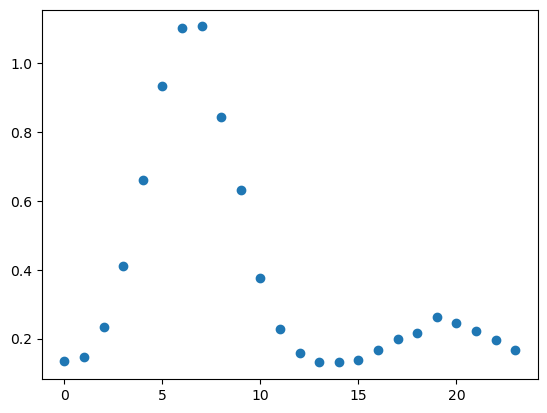

In [21]:
rain_ave_hour = [train_df[train_df['hour']==i].mean()['rain_1h'] for i in range(train_df['hour'].nunique())]
plt.scatter([i for i in range(train_df['hour'].nunique())], rain_ave_hour)

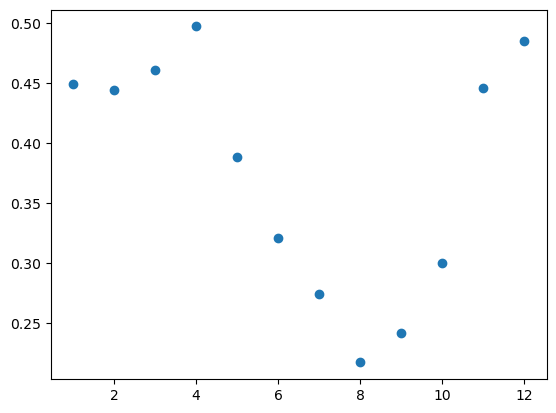

In [85]:
rain_ave_month = [train_df[train_df['month']==i+1].mean()['rain_1h'] for i in range(train_df['month'].nunique())]
plt.scatter([i+1 for i in range(train_df['month'].nunique())], rain_ave_month)

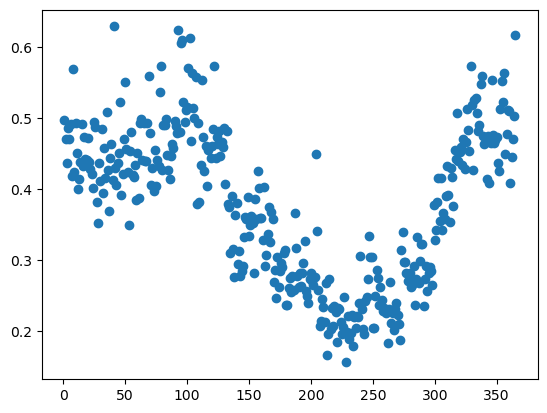

In [23]:
rain_ave_dayofyear = [train_df[train_df['dayofyear']==i].mean()['rain_1h'] for i in range(train_df['dayofyear'].nunique())]
plt.scatter([i for i in range(train_df['dayofyear'].nunique())], rain_ave_dayofyear)

In [210]:
month_list = train_df.groupby('month').mean()['rain_1h'].sort_values(ascending=False).reset_index()['month'].to_list()
hour_list = train_df.groupby('hour').mean()['rain_1h'].sort_values(ascending=False).reset_index()['hour'].to_list()
day_of_year_list = train_df.groupby('dayofyear').mean()['rain_1h'].sort_values(ascending=False).reset_index()['dayofyear'].to_list()

month = train_df['month'].unique()
hour = train_df['hour'].unique()
dayofyear = train_df['dayofyear'].unique()

train_df['month_sorted'] = train_df['month'].replace(month_list, month)
train_df['hour_sorted'] = train_df['hour'].replace(hour_list, hour)
train_df['dayofyear_sorted'] = train_df['dayofyear'].replace(day_of_year_list, dayofyear)

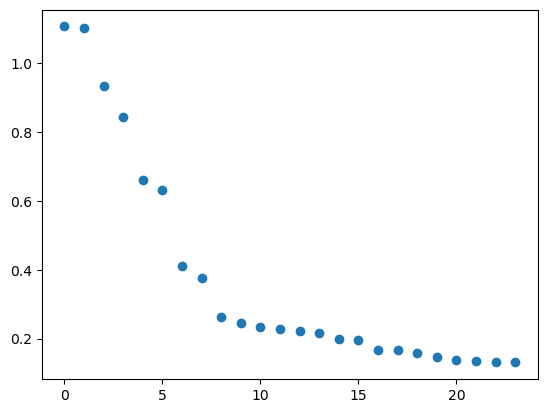

In [24]:
rain_ave_hour = [train_df[train_df['hour_sorted']==i].mean()['rain_1h'] for i in range(train_df['hour_sorted'].nunique())]
plt.scatter([i for i in range(train_df['hour'].nunique())], rain_ave_hour)

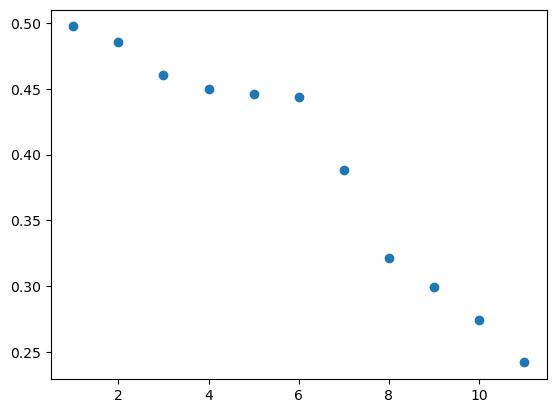

In [25]:
rain_ave_hour = [train_df[train_df['month_sorted']==i+1].mean()['rain_1h'] for i in range(train_df['month_sorted'].nunique())]
plt.scatter([i for i in range(train_df['month'].nunique())], rain_ave_hour)

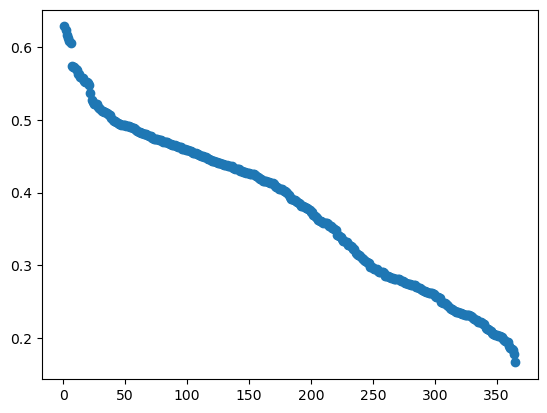

In [26]:
rain_ave_hour = [train_df[train_df['dayofyear_sorted']==i].mean()['rain_1h'] for i in range(train_df['dayofyear_sorted'].nunique())]
plt.scatter([i for i in range(train_df['dayofyear'].nunique())], rain_ave_hour)

In [221]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   temp                    341880 non-null  float64
 1   d_point                 341880 non-null  float64
 2   feels                   341880 non-null  float64
 3   min_temp                341880 non-null  float64
 4   max_temp                341880 non-null  float64
 5   prssr                   341880 non-null  float64
 6   hum                     341880 non-null  float64
 7   wind_spd                341880 non-null  float64
 8   wind_deg                341880 non-null  float64
 9   rain_1h                 341880 non-null  float64
 10  clouds                  341880 non-null  float64
 11  month                   341880 non-null  int64  
 12  hour                    341880 non-null  int64  
 13  dayofyear               341880 non-null  int64  
 14  month_sorted        

In [211]:
train_df['temp_range'] = train_df['max_temp'] - train_df['min_temp']

### Row to Feature

In [5]:
def to_feature(dataframe, new_features, backstep):
    new_dataframe = pd.DataFrame([])
    for feature in new_features:
        added_features_columns = [feature+str(i) for i in range(backstep)]
        added_features = []
        for i in range(backstep, len(dataframe)):
            row = []
            for j in range(backstep):
                row.append(dataframe[feature][i-backstep+j])
            added_features.append(row)
        added_features = pd.DataFrame(added_features)
        added_features.columns = added_features_columns
        new_dataframe = pd.concat([new_dataframe, added_features], axis=1)
    
    for ori in dataframe.columns:
        new_dataframe = pd.concat([new_dataframe, dataframe[ori][backstep:].reset_index()], axis=1)
    
    return new_dataframe.drop('index', axis=1)

In [6]:
backstep = 8
for i in range(backstep):
    j = str(i+1)
    train_df['prssr_trend_hourly'+j] = train_df['prssr'].diff(periods=i+1)
    train_df['temp_trend_hourly'+j] = train_df['temp'].diff(periods=i+1)
    train_df['min_temp_trend_hourly'+j] = train_df['min_temp'].diff(periods=i+1)
    train_df['max_temp_trend_hourly'+j] = train_df['max_temp'].diff(periods=i+1)
    train_df['d_point_trend_hourly'+j] = train_df['d_point'].diff(periods=i+1)
    train_df['hum_trend_hourly'+j] = train_df['hum'].diff(periods=i+1)

In [53]:
from scipy.stats import linregress

def lsma(dataframe, features, window):
    new_dataframe = dataframe.copy()[window:]
    x = [a for a in range(window)]
    for feature in features:
        feature_lsma = []
        for i in range(len(dataframe)-window):
            y = [dataframe[feature][i+j] for j in range(window)]
            slope, _, _, _, _ = linregress(x, y)
            feature_lsma.append(slope)
        new_dataframe[feature+'_lsma'] = feature_lsma
    
    return pd.DataFrame(new_dataframe).reset_index().drop('index', axis=1)

In [49]:
def sma(dataframe, features, window):
    new_dataframe = dataframe.copy()
    for feature in features:
        feature_sma = []
        for i in range(len(dataframe)-window):
            y = [dataframe[feature][i+j] for j in range(window)]
            mean = sum(y)/len(y)
            feature_sma.append(mean)
        custom_nan = [np.nan] * window
        custom_nan.append(feature_sma)
        new_dataframe[feature+'_sma'] = custom_nan
    
    return new_dataframe.reset_index().drop('index', axis=1)[window:]

In [51]:
window = 8
ma_features = ['temp', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr']

In [ ]:
abc = lsma(train_df, ma_features, window)

In [7]:
features_list = ['temp', 'feels', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr', 'wind_spd']
for i in range(backstep):
    j = str(i+1)
    features_list.append('prssr_trend_hourly'+str(i+1))
    
new_train_df = to_feature(train_df, features_list, backstep)

In [9]:
window = 8
ma_features = ['temp', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr']
new_train_df = sma(new_train_df, ma_features, window)

In [8]:
remove_one = []
new_train_df = new_train_df.reset_index().drop('index', axis=1)

for i in range(len(new_train_df['rain_1h'])):
    if new_train_df['rain_1h'][i] == 1 and new_train_df['rain_1h'][i-1] == 0 and new_train_df['rain_1h'][i+1] == 0:
        remove_one.append(0)
    else:
        remove_one.append(new_train_df['rain_1h'][i])

new_train_df['rain_1h'] = remove_one

In [9]:
hour_bins = [-1, 2, 10, np.inf]
month_bins = [0, 4, 10, np.inf]
hour_labels = [0, 1, 0]
month_labels = [1, 0, 1]

new_train_df['new_hour'] = pd.cut(new_train_df['hour'], hour_bins, labels=hour_labels, ordered=False).astype('int')
new_train_df['new_month'] = pd.cut(new_train_df['month'], month_bins, labels=month_labels, ordered=False).astype('int')

In [231]:
# new_train_df['wind_x'] = new_train_df['wind_spd'] * np.cos(np.deg2rad(new_train_df['wind_deg']))
# new_train_df['wind_y'] = new_train_df['wind_spd'] * np.sin(np.deg2rad(new_train_df['wind_deg']))

In [10]:
new_train_df['wind_sin'] = np.sin(np.deg2rad(new_train_df['wind_deg']))
new_train_df['wind_cos'] = np.cos(np.deg2rad(new_train_df['wind_deg']))

In [232]:
# bins = [0, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5, np.inf]
# labels = ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw', 'n']

# new_train_df['wind_deg'] = pd.cut(new_train_df['wind_deg'], bins, labels=labels, ordered=False)
# new_train_df = pd.get_dummies(new_train_df, prefix='wind_deg', columns=['wind_deg'])

In [12]:
from scipy.stats import linregress

def add_rolling_features(df, columns, window):
    for column in columns:
        df[column + f'_rolling_mean_{window}'] = df[column].rolling(window=window).mean()
        rolling_slope = df[column].rolling(window=window).apply(lambda x: linregress(range(window), x).slope, raw=False)
        df[column + f'_rolling_slope_{window}'] = rolling_slope
        # df[column + f'_rolling_median_{window}'] = df[column].rolling(window=window).median()
        # df[column + f'_rolling_std_{window}'] = df[column].rolling(window=window).std()
        # df[column + f'_rolling_min_{window}'] = df[column].rolling(window=window).min()
        # df[column + f'_rolling_max_{window}'] = df[column].rolling(window=window).max()
        # df[column + f'_rolling_var_{window}'] = df[column].rolling(window=window).var()
        # df[column + f'_rolling_25_{window}'] = df[column].rolling(window=window).quantile(0.25)
        # df[column + f'_rolling_75_{window}'] = df[column].rolling(window=window).quantile(0.75)
        # df[column + f'_rolling_sum_{window}'] = df[column].rolling(window=window).sum()
        # df[column + f'_rolling_sem_{window}'] = df[column].rolling(window=window).sem()
    return df

new_train_df = add_rolling_features(new_train_df, ['temp', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr'], 8)
# new_train_df = add_rolling_features(new_train_df, ['temp', 'feels', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr', 'wind_spd'], 12)
# new_train_df = add_rolling_features(new_train_df, ['temp', 'feels', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr', 'wind_spd'], 6)
# new_train_df = add_rolling_features(new_train_df, ['temp', 'feels', 'min_temp', 'max_temp', 'd_point', 'hum', 'prssr', 'wind_spd'], 3)

In [194]:
# new_train_df = new_train_df.dropna()

## Preprocessing

In [14]:
random_state = 1

### Splitting

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train_df.drop('rain_1h', axis=1), new_train_df['rain_1h'], test_size=0.2, random_state=random_state) 

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273497, 199)
(68375, 199)
(273497,)
(68375,)


### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [15]:
from flaml.default import LGBMRegressor
from sklearn.metrics import mean_squared_error

clas = LGBMRegressor(random_state=random_state)
clas.fit(X_train, y_train)
clas_pred = clas.predict(X_test)
print('rmse: ', np.sqrt(mean_squared_error(y_test, clas_pred)))

rmse:  0.7107002481141561


In [66]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor(random_state=random_state, depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

model = CatBoostRegressor(random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred, squared=False))

Learning rate set to 0.099361
0:	learn: 0.9223780	total: 254ms	remaining: 4m 14s
1:	learn: 0.9033300	total: 495ms	remaining: 4m 7s
2:	learn: 0.8869099	total: 728ms	remaining: 4m 2s
3:	learn: 0.8727914	total: 944ms	remaining: 3m 55s
4:	learn: 0.8610411	total: 1.16s	remaining: 3m 50s
5:	learn: 0.8510432	total: 1.35s	remaining: 3m 43s
6:	learn: 0.8427003	total: 1.55s	remaining: 3m 40s
7:	learn: 0.8351025	total: 1.72s	remaining: 3m 32s
8:	learn: 0.8288050	total: 1.92s	remaining: 3m 31s
9:	learn: 0.8231547	total: 2.11s	remaining: 3m 28s
10:	learn: 0.8181583	total: 2.32s	remaining: 3m 28s
11:	learn: 0.8138458	total: 2.53s	remaining: 3m 28s
12:	learn: 0.8095027	total: 2.73s	remaining: 3m 27s
13:	learn: 0.8061946	total: 2.92s	remaining: 3m 26s
14:	learn: 0.8029121	total: 3.09s	remaining: 3m 22s
15:	learn: 0.7998192	total: 3.27s	remaining: 3m 20s
16:	learn: 0.7974880	total: 3.45s	remaining: 3m 19s
17:	learn: 0.7951553	total: 3.64s	remaining: 3m 18s
18:	learn: 0.7931411	total: 3.83s	remaining: 3

In [71]:
import optuna

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'metric': 'rmse', 
        'random_state': 1,
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'reg_alpha': trial.suggest_categorical('reg_alpha', [0.4, 0.5, 0.6, 0.7, 0.8]),
        'reg_lambda': trial.suggest_categorical('reg_lambda', [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.7, 0.8, 0.9, 1]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.015, 0.02, 0.025]),
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'n_jobs': -1
    }

    model = LGBMRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

In [15]:
import optuna

from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'random_state': 1,
        'iterations':trial.suggest_categorical("iterations", [1000, 1200]),
        'learning_rate':trial.suggest_float("learning_rate", .05, .12),
        'depth':trial.suggest_int("depth", 6, 16),
        'l2_leaf_reg':trial.suggest_int('l2_leaf_reg', 1, 10),
        "used_ram_limit": "3gb"
    }

    CBmodel = CatBoostClassifier(**param)
    CBmodel.fit(X_train, y_train)
    y_pred = CBmodel.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

In [72]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10, n_jobs=-1)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-09-23 00:55:54,714] A new study created in memory with name: no-name-56776c82-8a2b-461c-b0cf-fa16d7ccdf56


In [14]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.ensemble import StackingRegressor
from flaml.default import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

stacked_model = StackingRegressor(estimators=[('lgbm', clas), ('cb', model)], cv='prefit', n_jobs=-1)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))

0.7164093353068077


In [67]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred, squared=False))

0.7217939998531816


## Application

In [269]:
test = pd.read_csv('dataset/test_clean.csv', index_col=[0])

In [270]:
test['parsed_datetime'] = pd.to_datetime(test['parsed_datetime'])

test['month'] = [x.month for x in test['parsed_datetime']]
test['hour'] = [x.hour for x in test['parsed_datetime']]
test['dayofyear'] = [x.dayofyear for x in test['parsed_datetime']]

test.drop('parsed_datetime', axis=1, inplace=True)

In [271]:
test['month_sorted'] = test['month'].replace(month_list, month)
test['hour_sorted'] = test['hour'].replace(hour_list, hour)
test['dayofyear_sorted'] = test['dayofyear'].replace(day_of_year_list, dayofyear)

In [272]:
test['temp_range'] = test['max_temp'] - test['min_temp']

In [273]:
for i in range(backstep):
    j = str(i+1)
    test['prssr_trend_hourly'+j] = test['prssr'].diff(periods=i+1)
    test['temp_trend_hourly'+j] = test['temp'].diff(periods=i+1)
    test['min_temp_trend_hourly'+j] = test['min_temp'].diff(periods=i+1)
    test['max_temp_trend_hourly'+j] = test['max_temp'].diff(periods=i+1)
    test['d_point_trend_hourly'+j] = test['d_point'].diff(periods=i+1)
    test['hum_trend_hourly'+j] = test['hum'].diff(periods=i+1)

In [274]:
test = pd.concat([train_df[-backstep:], test]).reset_index()
test = test.drop(['index', 'rain_1h'], axis=1)


In [298]:
new_test = to_feature(test, features_list, backstep)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Columns: 193 entries, temp0 to hum_trend_hourly8
dtypes: float64(187), int64(6)
memory usage: 72.7 MB


In [301]:
new_test = pd.concat([train_df[-window:], new_test]).reset_index()
new_test = new_test.drop(['index', 'rain_1h'], axis=1)

In [313]:
new_test = sma(new_test, ma_features, window)

In [314]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 8 to 49375
Columns: 199 entries, temp to prssr_lsma
dtypes: float64(187), int64(6), object(6)
memory usage: 75.0+ MB


In [315]:
hour_bins = [-1, 2, 10, np.inf]
month_bins = [0, 4, 10, np.inf]
hour_labels = [0, 1, 0]
month_labels = [1, 0, 1]

new_test['new_hour'] = pd.cut(new_test['hour'], hour_bins, labels=hour_labels, ordered=False).astype('int')
new_test['new_month'] = pd.cut(new_test['month'], month_bins, labels=month_labels, ordered=False).astype('int')

In [316]:
new_test['wind_x'] = new_test['wind_spd'] * np.cos(np.deg2rad(new_test['wind_deg']))
new_test['wind_y'] = new_test['wind_spd'] * np.sin(np.deg2rad(new_test['wind_deg']))

In [317]:
bins = [0, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5, np.inf]
labels = ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw', 'n']

new_test['wind_deg'] = pd.cut(new_test['wind_deg'], bins, labels=labels, ordered=False)
new_test = pd.get_dummies(new_test, prefix='wind_deg', columns=['wind_deg'])

In [318]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 8 to 49375
Columns: 210 entries, temp to wind_deg_w
dtypes: float64(188), int32(2), int64(6), object(6), uint8(8)
memory usage: 76.1+ MB


In [319]:
preds = model.predict(new_test)

In [224]:
preds

array([0.29024826, 0.26770143, 0.29169453, ..., 0.22125601, 0.16793778,
       0.11418194])

In [320]:
new_preds = []

for x in preds:
    if x < 0:
        new_preds.append(0)
    else:
        new_preds.append(x)

new_preds = np.array(new_preds)

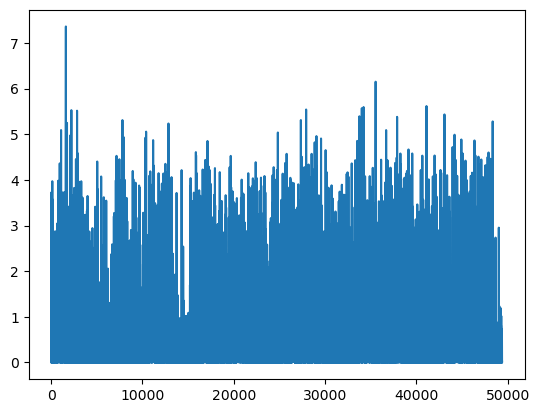

In [321]:
plt.plot(new_preds)

In [322]:
new = pd.read_csv('dataset/test_clean.csv', index_col=[0])

submission = new['parsed_datetime']
submission = pd.DataFrame(submission)
submission['rain_1h'] = new_preds
submission.columns = ['datetime_iso', 'rain_1h']
submission

,datetime_iso,rain_1h
0,2018-01-01 00:00:00+00:00,0.708585
1,2018-01-01 01:00:00+00:00,0.184519
2,2018-01-01 02:00:00+00:00,0.127118
3,2018-01-01 03:00:00+00:00,1.377634
4,2018-01-01 04:00:00+00:00,1.397839
...,...,...
49363,2023-08-19 19:00:00+00:00,0.010879
49364,2023-08-19 20:00:00+00:00,0.000000
49365,2023-08-19 21:00:00+00:00,0.000000
49366,2023-08-19 22:00:00+00:00,0.000000


In [81]:
submission.to_csv('submission/submission_e11.csv', index=False)

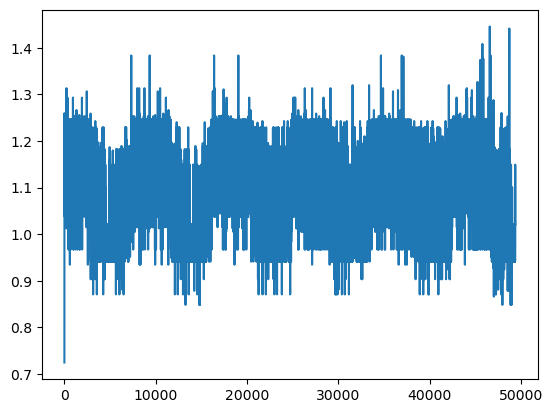

In [2]:
xyz = pd.read_csv('submission/submission_e5.csv')
plt.plot(xyz['rain_1h'])